In [1]:
#libraries for creating neural networks
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE

#libraries to help visualize data
import matplotlib.pyplot as plt

#libraries to shuffle image data
import os #used to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples
import glob #used to find matching directories 

#library to help duplicate images
import cv2

In [2]:
class_names = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

In [4]:
#here is where we will preprocess our data (or in this case, obtain the data)

train_type1 = "Dataset/type1_sorted/train"
test_type1 = "Dataset/type1_sorted/test"

train_type2 = "Dataset/type2_sorted/train"
test_type2 = "Dataset/type2_sorted/test"

# #read in csv file that has number of files in each folder
num_files = pd.read_csv("Num_Types.csv")
# print(num_files["Type1"].loc[0:5])
type1_num = num_files["Type1"]
type2_num = num_files["Type2"]

# #threshold number to reach when oversampling (only works for 2 model multilabel classification, need to modify if using one model w/ sigmoid)
type1_total = 850
type2_total = 3700

#do image data augmentation to oversample?: https://www.marktechpost.com/2021/04/05/image-data-augmentation-in-keras/
#oversample the data for each train folder
# os.mkdir(train_type1 + "/temp/")

#repeat code below for rest of types
fairy_needed = type1_total - type1_num.loc[4]
for i in range(0, fairy_needed):
    img = random.sample(glob.glob(train_type1 + "/Fairy/*"), 1)
#     print(img)
    #FIX: need to rename image here before another random image is chosen (shutil.copy will not copy duplicates)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
#     print(parsedString)
#     print(img_name)
    new_img = train_type1 + "/Fairy/" + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    print(new_img)
    #might have to save copy/duplicate into separate folder, modify the name of the image, and then move it back to the respective type folder
    shutil.copy(img[0], new_img) #way to rename image while moving to folder
    
    
# for i in random.sample(glob.glob(train_type1 + "/Fairy/*"), fairy_needed):
#     shutil.copy(i, train_type1 + "/temp/") #copy a random image from the Bug folder into the same folder for oversampling
#     #https://stackoverflow.com/questions/16533078/clone-an-image-in-cv2-python
    


Dataset/type1_sorted/train/temp/icons-669-white(0).png
Dataset/type1_sorted/train/temp/crystal-175(1).png
Dataset/type1_sorted/train/temp/diamond-pearl-173(2).png
Dataset/type1_sorted/train/temp/diamond-pearl-209(3).png
Dataset/type1_sorted/train/temp/icons-716-active(4).png
Dataset/type1_sorted/train/temp/crystal-35(5).png
Dataset/type1_sorted/train/temp/red-blue-36(6).png
Dataset/type1_sorted/train/temp/black-white-175(7).png
Dataset/type1_sorted/train/temp/ruby-sapphire-35(8).png
Dataset/type1_sorted/train/temp/global-link-35(9).png
Dataset/type1_sorted/train/temp/diamond-pearl-35(10).png
Dataset/type1_sorted/train/temp/global-link-176(11).png
Dataset/type1_sorted/train/temp/yellow-35(12).png
Dataset/type1_sorted/train/temp/crystal-173(13).png
Dataset/type1_sorted/train/temp/black-white-468(14).png
Dataset/type1_sorted/train/temp/crystal-35(15).png
Dataset/type1_sorted/train/temp/silver-209(16).png
Dataset/type1_sorted/train/temp/icons-173(17).png
Dataset/type1_sorted/train/temp/ico

Dataset/type1_sorted/train/temp/icons-670-yellow(155).png
Dataset/type1_sorted/train/temp/emerald-176(156).png
Dataset/type1_sorted/train/temp/platinum-36(157).png
Dataset/type1_sorted/train/temp/icons-670-eternal(158).png
Dataset/type1_sorted/train/temp/black-white-36(159).png
Dataset/type1_sorted/train/temp/global-link-669-yellow(160).png
Dataset/type1_sorted/train/temp/icons-176(161).png
Dataset/type1_sorted/train/temp/global-link-670-red(162).png
Dataset/type1_sorted/train/temp/black-white-173(163).png
Dataset/type1_sorted/train/temp/platinum-173(164).png
Dataset/type1_sorted/train/temp/gold-36(165).png
Dataset/type1_sorted/train/temp/black-white-175(166).png
Dataset/type1_sorted/train/temp/icons-670-orange(167).png
Dataset/type1_sorted/train/temp/icons-670(168).png
Dataset/type1_sorted/train/temp/global-link-36(169).png
Dataset/type1_sorted/train/temp/black-white-173(170).png
Dataset/type1_sorted/train/temp/crystal-173(171).png
Dataset/type1_sorted/train/temp/platinum-35(172).png


Dataset/type1_sorted/train/temp/crystal-176(333).png
Dataset/type1_sorted/train/temp/icons-671(334).png
Dataset/type1_sorted/train/temp/icons-210(335).png
Dataset/type1_sorted/train/temp/emerald-173(336).png
Dataset/type1_sorted/train/temp/yellow-35(337).png
Dataset/type1_sorted/train/temp/global-link-671-yellow(338).png
Dataset/type1_sorted/train/temp/diamond-pearl-35(339).png
Dataset/type1_sorted/train/temp/global-link-669-white(340).png
Dataset/type1_sorted/train/temp/global-link-669-yellow(341).png
Dataset/type1_sorted/train/temp/platinum-468(342).png
Dataset/type1_sorted/train/temp/global-link-685(343).png
Dataset/type1_sorted/train/temp/emerald-175(344).png
Dataset/type1_sorted/train/temp/global-link-210(345).png
Dataset/type1_sorted/train/temp/emerald-176(346).png
Dataset/type1_sorted/train/temp/icons-669-yellow(347).png
Dataset/type1_sorted/train/temp/icons-176(348).png
Dataset/type1_sorted/train/temp/platinum-173(349).png
Dataset/type1_sorted/train/temp/icons-35(350).png
Datas

Dataset/type1_sorted/train/temp/emerald-173(496).png
Dataset/type1_sorted/train/temp/ruby-sapphire-209(497).png
Dataset/type1_sorted/train/temp/heartgold-soulsilver-173(498).png
Dataset/type1_sorted/train/temp/crystal-173(499).png
Dataset/type1_sorted/train/temp/global-link-671-red(500).png
Dataset/type1_sorted/train/temp/crystal-175(501).png
Dataset/type1_sorted/train/temp/icons-670-orange(502).png
Dataset/type1_sorted/train/temp/icons-669-orange(503).png
Dataset/type1_sorted/train/temp/black-white-210(504).png
Dataset/type1_sorted/train/temp/ruby-sapphire-35(505).png
Dataset/type1_sorted/train/temp/gold-173(506).png
Dataset/type1_sorted/train/temp/global-link-669-yellow(507).png
Dataset/type1_sorted/train/temp/diamond-pearl-209(508).png
Dataset/type1_sorted/train/temp/icons-716-active(509).png
Dataset/type1_sorted/train/temp/red-green-35(510).png
Dataset/type1_sorted/train/temp/diamond-pearl-36(511).png
Dataset/type1_sorted/train/temp/ruby-sapphire-35(512).png
Dataset/type1_sorted/tr

Dataset/type1_sorted/train/temp/gold-210(666).png
Dataset/type1_sorted/train/temp/black-white-175(667).png
Dataset/type1_sorted/train/temp/black-white-468(668).png
Dataset/type1_sorted/train/temp/global-link-176(669).png
Dataset/type1_sorted/train/temp/silver-173(670).png
Dataset/type1_sorted/train/temp/global-link-669-blue(671).png
Dataset/type1_sorted/train/temp/global-link-670(672).png
Dataset/type1_sorted/train/temp/gold-36(673).png
Dataset/type1_sorted/train/temp/icons-669-red(674).png
Dataset/type1_sorted/train/temp/global-link-36(675).png
Dataset/type1_sorted/train/temp/icons-671-blue(676).png
Dataset/type1_sorted/train/temp/global-link-35(677).png
Dataset/type1_sorted/train/temp/icons-671-orange(678).png
Dataset/type1_sorted/train/temp/emerald-175(679).png
Dataset/type1_sorted/train/temp/emerald-175(680).png
Dataset/type1_sorted/train/temp/ruby-sapphire-175(681).png
Dataset/type1_sorted/train/temp/silver-175(682).png
Dataset/type1_sorted/train/temp/icons-716(683).png
Dataset/ty

In [16]:
#data augmentation: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#ImageDataGenerator: https://keras.io/api/preprocessing/image/
datagen = ImageDataGenerator(rotation_range=360,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2,
                             preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                            )

train_batch = datagen.flow_from_directory(directory=train_type1, target_size=(64,64), classes=class_names, batch_size=10, shuffle=True)

#method 2: https://medium.com/swlh/how-to-use-smote-for-dealing-with-imbalanced-image-dataset-for-solving-classification-problems-3aba7d2b9cad

# train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#     .flow_from_directory(directory=train_type1, target_size=(64, 64), classes=class_names, batch_size=10, shuffle=True)
# test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
#     .flow_from_directory(directory=test_type1, target_size=(64, 64), classes=class_names, batch_size=10, shuffle=False)

Found 5332 images belonging to 18 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

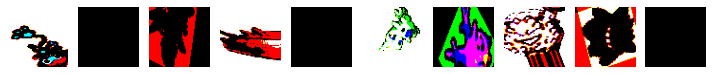

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
#visualize data (function is from tensorflow's website)
imgs, labels = next(train_batch)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)

In [18]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Flatten(),
    Dense(units = 19, activation = 'sigmoid'),
])
#definitely need to extend, feels like data is being overfitted?

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 18)                294930    
Total params: 314,322
Trainable params: 314,322
Non-trainable params: 0
__________________________________________________

In [20]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [21]:
model.fit(x=train_batch, epochs=10, verbose=2)

Epoch 1/10


KeyboardInterrupt: 

In [37]:
output = model.predict(test_batch)
output

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])